**Atp 2024 season analysis**


Main stats to do:


1-surface winrate for each player


2-

In [1]:
# Importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [16]:
##reading the data
df = pd.read_csv('atp_matches_2024.csv')
df2 = pd.read_csv('atp_rankings_current.csv')
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2024-0339,Brisbane,Hard,32,A,20240101,300,105777,2.0,NaN,...,58.0,44.0,16.0,11.0,8.0,9.0,14.0,2570.0,8.0,3660.0
1,2024-0339,Brisbane,Hard,32,A,20240101,299,208029,1.0,NaN,...,35.0,31.0,10.0,11.0,5.0,7.0,8.0,3660.0,39.0,1122.0
2,2024-0339,Brisbane,Hard,32,A,20240101,298,105777,2.0,NaN,...,39.0,24.0,14.0,10.0,5.0,7.0,14.0,2570.0,55.0,902.0
3,2024-0339,Brisbane,Hard,32,A,20240101,297,208029,1.0,NaN,...,51.0,31.0,16.0,10.0,3.0,5.0,8.0,3660.0,116.0,573.0
4,2024-0339,Brisbane,Hard,32,A,20240101,296,126128,NaN,NaN,...,37.0,27.0,16.0,10.0,5.0,8.0,39.0,1122.0,44.0,1021.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          3076 non-null   object 
 1   tourney_name        3076 non-null   object 
 2   surface             3076 non-null   object 
 3   draw_size           3076 non-null   int64  
 4   tourney_level       3076 non-null   object 
 5   tourney_date        3076 non-null   int64  
 6   match_num           3076 non-null   int64  
 7   winner_id           3076 non-null   int64  
 8   winner_seed         1294 non-null   float64
 9   winner_entry        477 non-null    object 
 10  winner_name         3076 non-null   object 
 11  winner_hand         3076 non-null   object 
 12  winner_ht           3057 non-null   float64
 13  winner_ioc          3076 non-null   object 
 14  winner_age          3075 non-null   float64
 15  loser_id            3076 non-null   int64  
 16  loser_

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92341 entries, 0 to 92340
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ranking_date  92341 non-null  int64
 1   rank          92341 non-null  int64
 2   player        92341 non-null  int64
 3   points        92341 non-null  int64
dtypes: int64(4)
memory usage: 2.8 MB


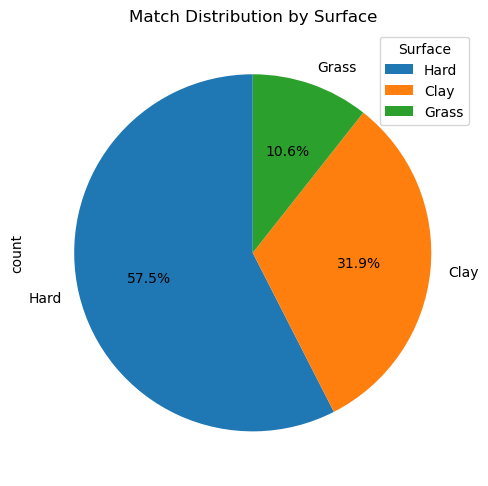

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

df['surface'].value_counts().plot(
    kind='pie', # type of visulization
    autopct='%1.1f%%',      # show percentages
    startangle=90         # better orientation
)
ax.set_title('Match Distribution by Surface')
plt.legend(
    title='Surface',
    loc='best' # location of the legend
)
plt.tight_layout()
plt.show()

In [ ]:
# average time for matches for the whole season
avg_time= df['minutes'].mean()
print(f'average time for matches for the whole season is {int(avg_time)}')


average time for matches for the whole season is 115


In [82]:
df['tourney_level'].value_counts()

tourney_level
A    1519
M     695
G     508
D     260
O      64
F      30
Name: count, dtype: int64

In [125]:
types = {
    'Masters<=500': int(df.loc[df['tourney_level'] == 'A', 'minutes'].mean()),
    'Masters_1000': int(df.loc[df['tourney_level'] == 'M', 'minutes'].mean()),
    'Grand_slam': int(df.loc[df['tourney_level'] == 'G', 'minutes'].mean()),
    'Davis_cup': int(df.loc[df['tourney_level'] == 'D', 'minutes'].mean()),
    # 'O': df.loc[df['tourney_level'] == 'O', 'minutes'].mean(),
    'Tour_finals': int(df.loc[df['tourney_level'] == 'F', 'minutes'].mean()),
}
print(types)



{'Masters<=500': 107, 'Masters_1000': 107, 'Grand_slam': 168, 'Davis_cup': 103, 'Tour_finals': 94}


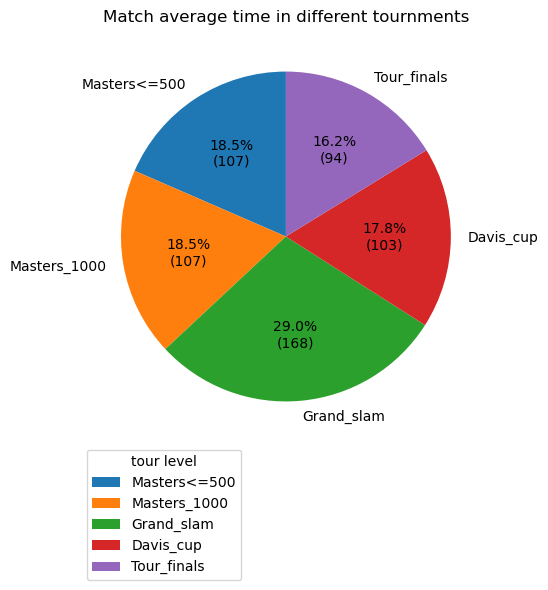

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    types.values(),
    labels = types.keys(),
    autopct=lambda p: f'{p:.1f}%\n({p*sum(types.values())/100:.0f})',# show percentages using lambda method "googled it"
    startangle=90         # better orientation
)
ax.set_title('Match average time in different tournments')
plt.legend(
    title='tour level',
    loc='upper left', # location of the legend
    bbox_to_anchor=(0, 0),# location of the legend
)
plt.tight_layout()
plt.show()

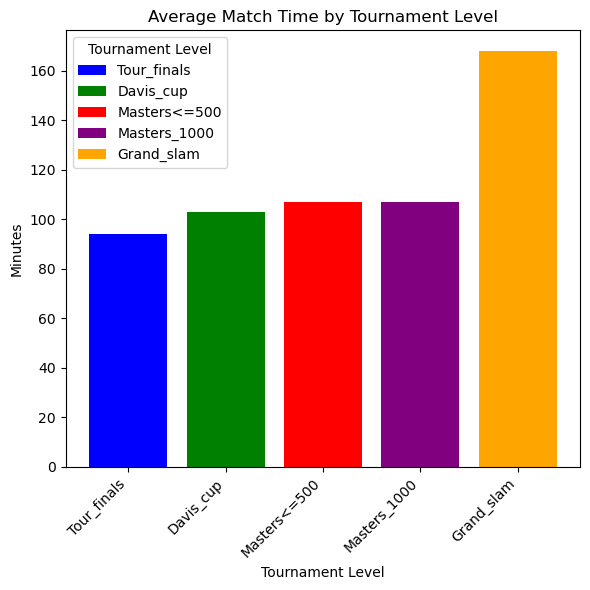

In [134]:
types_sorted = dict(sorted(types.items(), key=lambda x: x[1])) ## sorting the keys for dictionary
colors = ['blue', 'green', 'red', 'purple', 'orange'] # choosing the colors for the displays 
fig, ax = plt.subplots(figsize=(6, 6))

bars = ax.bar(
    types_sorted.keys(),
    types_sorted.values(),
    color=colors
)

ax.legend(
    bars,
    types_sorted.keys(),
    title='Tournament Level',
    loc='upper left'
)

ax.set_title('Average Match Time by Tournament Level')
ax.set_ylabel('Minutes')
ax.set_xlabel('Tournament Level')
plt.xticks(rotation=45, ha='right') #fixing the gaps between the bars for better attirbute visualization
plt.tight_layout()


plt.show()
